# Self-Balancing Scooter Control

![](images/self-balancing-scooter.png)

> A self-balancing scooter [...] is a self-balancing personal transporter consisting of two motorized wheels connected to a pair of articulated pads on which the rider places their feet. The rider controls the speed by leaning forward or backward, and direction of travel by twisting the pads.
> 
> Source: <https://en.wikipedia.org/wiki/Self-balancing_scooter>

### Python Dependencies

In [78]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Scooter Planar Model
================================

### Introduction

We consider a simple model of a self-balancing scooter evolving in the plane. It is mainly made of

  - The frame that contains the two articulated pads; from above, each pad essentially look like a triangle (one vertice in the center of the frame, one vertice at each extremity of the wheel).

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the frame. 
    
Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the scooter faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the scooter moves forward.

### Parameter Definition

From now on, we assume that the seat frame length is $\ell = 50 \mbox{ cm}$ and the wheel radius is $r = 12.5 \mbox{ cm}$.

🧩 Define the corresponding Python variables `l` and `r` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [14]:
l = 0.5
r = 0.125

### Graphical Representation

🧩 Implement a function `draw_scooter` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with a red frame and black fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. Use a green circle marker 50 cm in of the frame to indicate which way is forward.

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

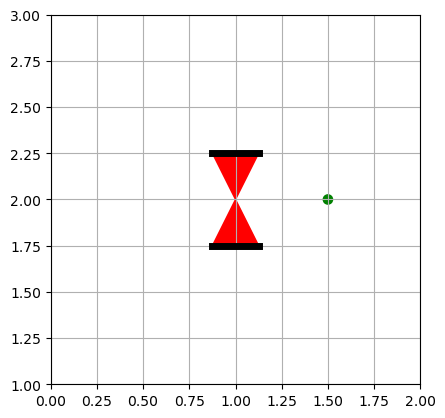

In [90]:
import numpy as np
import matplotlib.pyplot as plt


def draw_scooter(ax,x, y, theta):
    # On a ajouté l'argument ax pour tracer sur un graphique existant s'il est fourni (draw_arena)
    if ax == None:
        fig, ax = plt.subplots()
    
    
    # Définir le cadre comme deux triangles (chaque plateforme)
    demi_longueur = l / 2
    hauteur_plateforme = l / 4  # hauteur de chaque triangle (choix arbitraire pour la visualisation)
    
    # Définir les sommets des plateformes gauche et droite
    plateforme_gauche = np.array([
        [hauteur_plateforme, demi_longueur],
        [0, 0],
        [-hauteur_plateforme,demi_longueur]
    ])
    
    plateforme_droite = np.array([
        [hauteur_plateforme, -demi_longueur],
        [0, 0],
        [-hauteur_plateforme,-demi_longueur]
    ])
    
    # Définir les positions des roues
    positions_roues = [
        [-r, demi_longueur],  # roue gauche bas
        [r, demi_longueur],   # roue gauche haut
        [-r, -demi_longueur],   # roue droite bas
        [r,-demi_longueur]     # roue droite haut
    ]
    
    # Matrice de rotation pour l'angle theta
    R = np.array([[np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    
    # Tourner et traduire les points des roues
    roues = [np.dot(R, pos) + [x, y] for pos in positions_roues]
    plateforme_gauche = [np.dot(R, pos) + [x, y] for pos in plateforme_gauche]
    plateforme_droite = [np.dot(R, pos) + [x, y] for pos in plateforme_droite]


    # Dessiner la plateforme gauche
    poly_gauche = plt.Polygon(plateforme_gauche, color='red')
    ax.add_patch(poly_gauche)
    
    # Dessiner la plateforme droite
    poly_droite = plt.Polygon(plateforme_droite, color='red')
    ax.add_patch(poly_droite)
    
    # Dessiner les roues comme des lignes
    ax.plot([roues[0][0], roues[1][0]], [roues[0][1], roues[1][1]], 'k-', lw=5)  # ligne noire pour la roue gauche
    ax.plot([roues[2][0], roues[3][0]], [roues[2][1], roues[3][1]], 'k-', lw=5)  # ligne noire pour la roue droite
    
    # Dessiner le marqueur de direction vers l'avant
    marqueur_avant = np.dot(R, [0.5, 0]) + [x, y]  # 50 cm (0,5 mètres) devant le cadre
    cercle_vert = plt.Circle((marqueur_avant[0], marqueur_avant[1]), 0.025, color='green', fill=True)  # rayon de 0.025 mètres, 50 cm est trop grand
    ax.add_patch(cercle_vert)
    
    # Définir les limites du graphique
    ax.set_xlim(x - 1, x + 1)
    ax.set_ylim(y - 1, y + 1)
    
    # Ajouter des lignes de grille pour référence visuelle
    ax.grid(True)
    
    # Définir un rapport d'aspect égal
    ax.set_aspect('equal')
    plt.show()

# Exemple d'utilisation
draw_scooter(None,1, 2, 0)

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [88]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

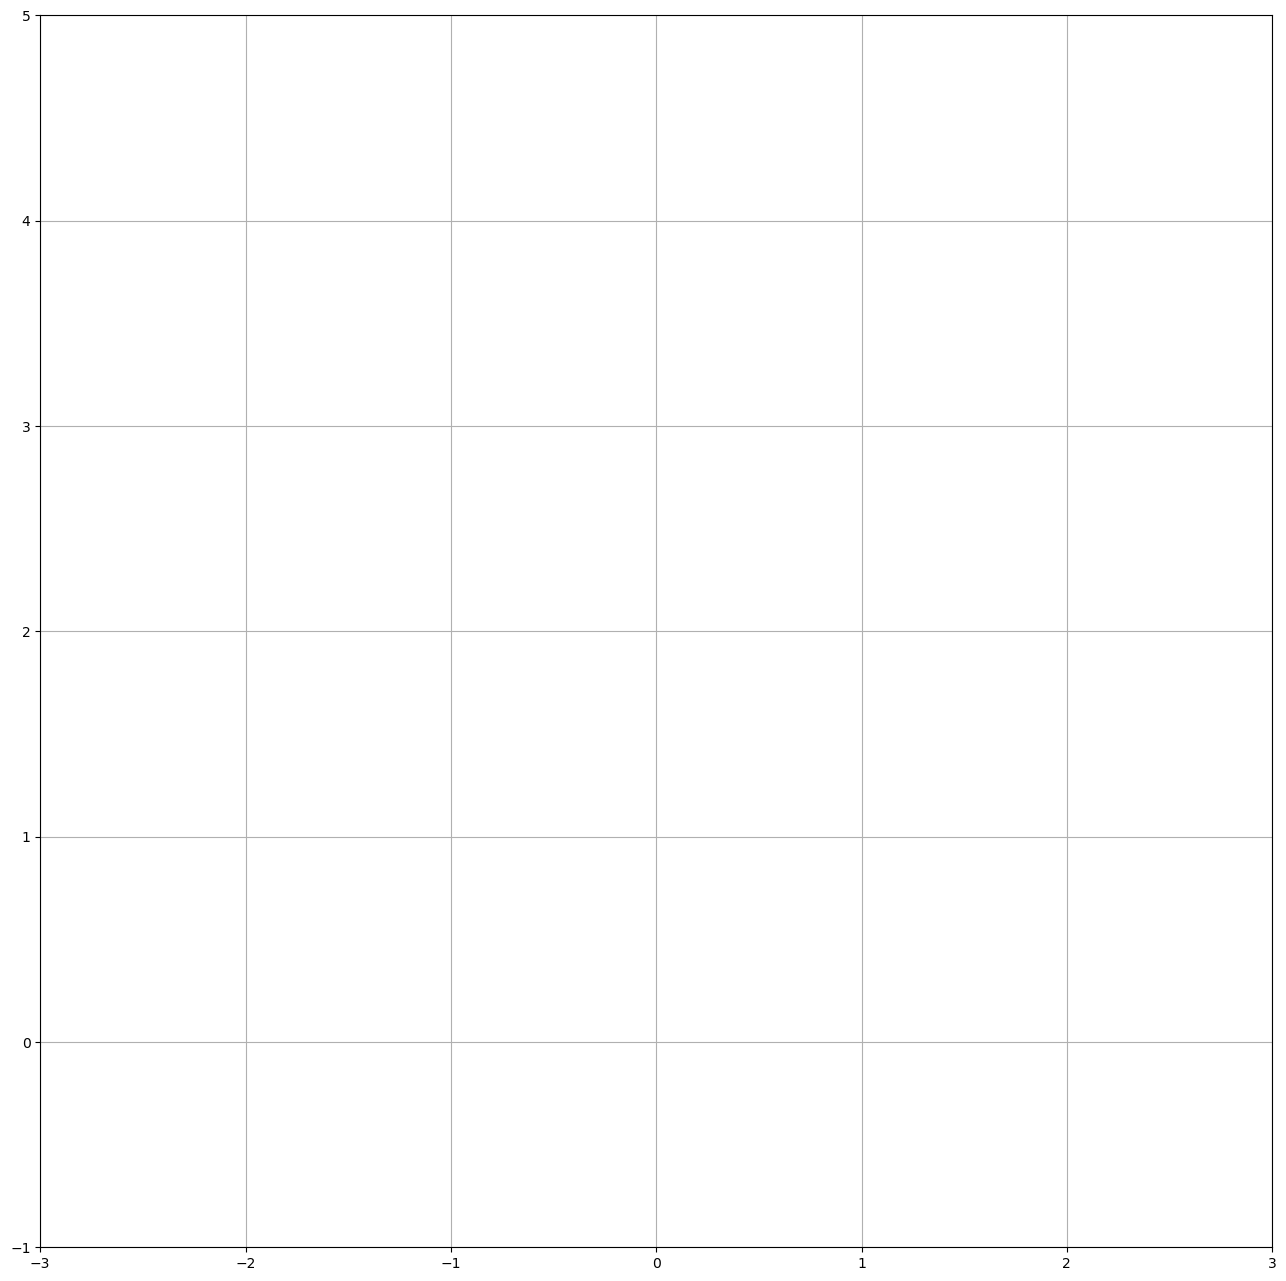

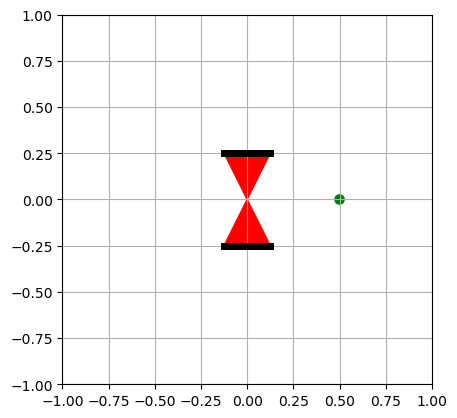

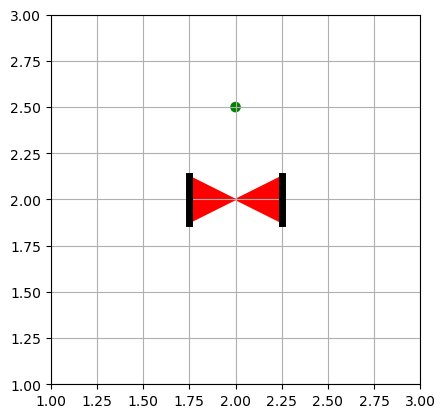

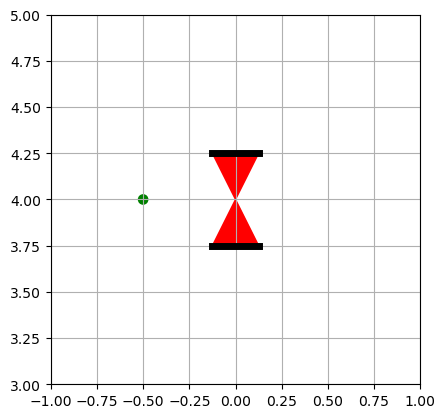

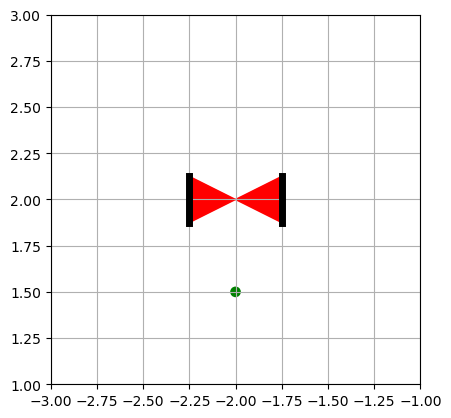

In [89]:
ax = draw_arena(-3, 3, -1, 5)

positions = [
    (0, 0, 0),
    (2, 2, np.pi/2),
    (0, 4, np.pi),
    (-2, 2, 3*np.pi/2)
]

for x, y, theta in positions:
    draw_scooter(ax,x, y, theta)

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**TODO**

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**TODO**

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**TODO**

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [6]:
def omega(t, xytheta):
    omega_l = (1 - l/4) * pi / r
    omega_r = (1 + l/4) * pi / r
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [7]:
pass

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - \ell/4)  \pi / r \mbox{ rad/s}$ and $\omega_r = (1 + \ell/4)  \pi / r \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [8]:
pass

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

In [9]:
pass

🧩 Use the simulation results to display the robot location every 0.5 second.

In [10]:
pass

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**TODO**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [11]:
pass

🧩 If needed, adjust the simulation parameters the simulated position error is less than $1\, \mathrm{ mm}$. 

In [12]:
pass